# Customer Segmentation using K-means

## Importing Libraries

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')


## Loading Libraries

In [56]:
customer_data=pd.read_csv("E:/Data Science/data/Mall customers/Mall_Customers.csv")

In [57]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [58]:
customer_data.shape

(200, 5)

In [59]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [60]:
customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [61]:
customer_data.isna().sum().sum()    # No missing values in total

0

- We are grouping on the basis of Annual Income & Spending Score only so we select them only we can use age also but id is 
useless

In [63]:
X=customer_data.iloc[:,[3,4]].values                      #customer_data[['Annual Income (k$)','Spending Score (1-100)']]
X                                                               # then cant use scatterplot

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

can use iloc also # iloc[:,:] ie [row range, column range] also

### WCSS (Within cluster sum of squares)

In [ ]:
# Finding WCSS value for different number of clusters (elbow curve use minimum is chosen)

In [64]:
wcss=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=42)      # i number of clusters  # init means initiation method
    kmeans.fit(X)
    
    wcss.append(kmeans.inertia_)                  # gives wcss

Text(0, 0.5, 'WCSS')

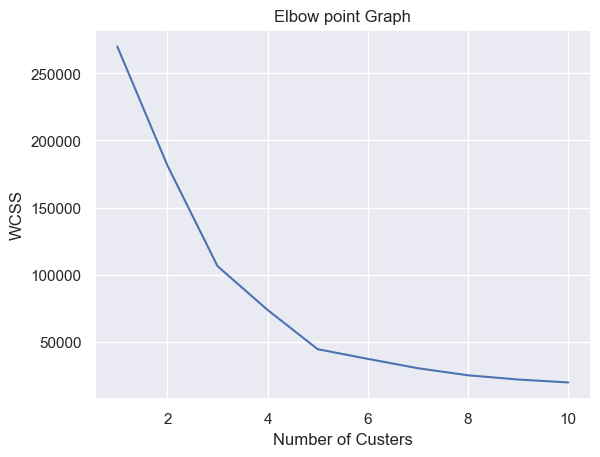

In [65]:
# plot an elbow graph

sns.set()
plt.plot(range(1,11),wcss)    #x,y
plt.title('Elbow point Graph')
plt.xlabel('Number of Custers')
plt.ylabel('WCSS')

- We can see there is drop after 3,5 clusters we select 5 because after that there is no significnat drop
- optimum number of clusters =5

- Training the k-means clustering model (k -> number of clusters)

# This is unsupervised learning so there is no X,Y only train and test we make

In [66]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=0)

Y=kmeans.fit_predict(X)
print(Y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


#### Visualising the clusters and their centroids

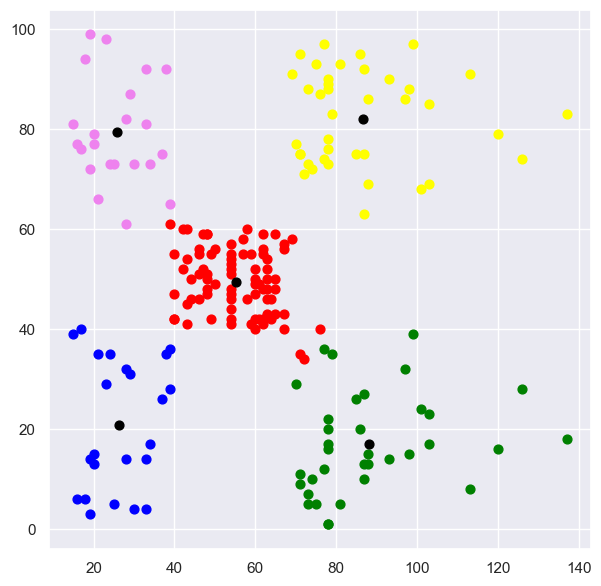

In [70]:
# We assign a label to each cluster

plt.figure(figsize=(7,7))
plt.scatter(X[Y==0,0],X[Y==0,1],s=40,c='green',label='Cluster1')
plt.scatter(X[Y==1,0],X[Y==1,1],s=40,c='red',label='Cluster2')
plt.scatter(X[Y==2,0],X[Y==2,1],s=40,c='yellow',label='Cluster3')
plt.scatter(X[Y==3,0],X[Y==3,1],s=40,c='violet',label='Cluster4')
plt.scatter(X[Y==4,0],X[Y==4,1],s=40,c='blue',label='Cluster5')

# plot the centroids

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=40,c='black',label='Centroids')